# Khám phá dữ liệu Airbnb NYC 2019

Notebook này thực hiện các phân tích sau:
1. Kiểm tra dữ liệu tổng quan (Data Overview)
   - Kích thước dữ liệu
   - Dữ liệu bị thiếu (Missing Values)
   - Thống kê cơ bản
2. Trực quan hóa dữ liệu (Visualization Results)

## 1. Import thư viện và load dữ liệu

In [1]:
import sys
import os
import numpy as np


sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from visualization import *
from data_processing import *

# Thiết lập hiển thị
%matplotlib inline

In [2]:
file_path = '../data/raw/AB_NYC_2019.csv'
data_numpy = read_csv(file_path)

column_names = data_numpy[0]
data = data_numpy[1:]

print("Dữ liệu đã được load thành công!")


Dữ liệu đã được load thành công!


## 2. Kiểm tra dữ liệu tổng quan (Data Overview)

### 2.1. Kích thước dữ liệu

In [3]:
print(f"Số hàng: {data.shape[0]:,}")
print(f"Số cột: {data.shape[1]}")
print(f"\nTổng số ô dữ liệu: {data.shape[0] * data.shape[1]:,}")

Số hàng: 48,895
Số cột: 16

Tổng số ô dữ liệu: 782,320


In [4]:
# Thông tin về các cột
print("\nThông tin về các cột:")
print(f"Tổng số cột: {len(column_names)}")
print("\nDanh sách các cột:")
for i, col in enumerate(column_names):
    print(f"  {i+1}. {col}")


Thông tin về các cột:
Tổng số cột: 16

Danh sách các cột:
  1. id
  2. name
  3. host_id
  4. host_name
  5. neighbourhood_group
  6. neighbourhood
  7. latitude
  8. longitude
  9. room_type
  10. price
  11. minimum_nights
  12. number_of_reviews
  13. last_review
  14. reviews_per_month
  15. calculated_host_listings_count
  16. availability_365


In [5]:
# Xem 5 dòng đầu
print("\n5 dòng đầu tiên của dữ liệu:")
for i in range(min(5, len(data))):
    print(f"Dòng {i+1}:", data[i])


5 dòng đầu tiên của dữ liệu:
Dòng 1: ['2539' 'Clean & quiet apt home by the park' '2787' 'John' 'Brooklyn'
 'Kensington' '40.64749' '-73.97237' 'Private room' '149' '1' '9'
 '2018-10-19' '0.21' '6' '365']
Dòng 2: ['2595' 'Skylit Midtown Castle' '2845' 'Jennifer' 'Manhattan' 'Midtown'
 '40.75362' '-73.98377' 'Entire home/apt' '225' '1' '45' '2019-05-21'
 '0.38' '2' '355']
Dòng 3: ['3647' 'THE VILLAGE OF HARLEM....NEW YORK !' '4632' 'Elisabeth'
 'Manhattan' 'Harlem' '40.80902' '-73.9419' 'Private room' '150' '3' '0'
 '' '' '1' '365']
Dòng 4: ['3831' 'Cozy Entire Floor of Brownstone' '4869' 'LisaRoxanne' 'Brooklyn'
 'Clinton Hill' '40.68514' '-73.95976' 'Entire home/apt' '89' '1' '270'
 '2019-07-05' '4.64' '1' '194']
Dòng 5: ['5022' 'Entire Apt: Spacious Studio/Loft by central park' '7192' 'Laura'
 'Manhattan' 'East Harlem' '40.79851' '-73.94399' 'Entire home/apt' '80'
 '10' '9' '2018-11-19' '0.10' '1' '0']


### 2.2. Dữ liệu bị thiếu (Missing Values)

Các cột bị thiếu giá trị

name:
  - Số lượng Missing : 16
  - Tỷ lệ % Missing  : 0.03%

host_name:
  - Số lượng Missing : 21
  - Tỷ lệ % Missing  : 0.04%

last_review:
  - Số lượng Missing : 10,052
  - Tỷ lệ % Missing  : 20.56%

reviews_per_month:
  - Số lượng Missing : 10,052
  - Tỷ lệ % Missing  : 20.56%


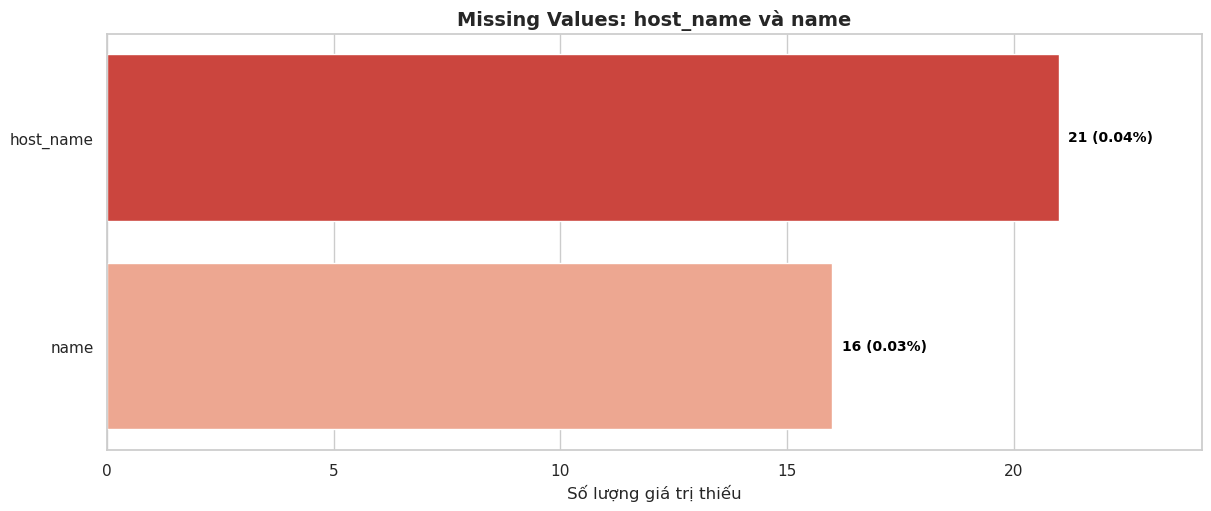

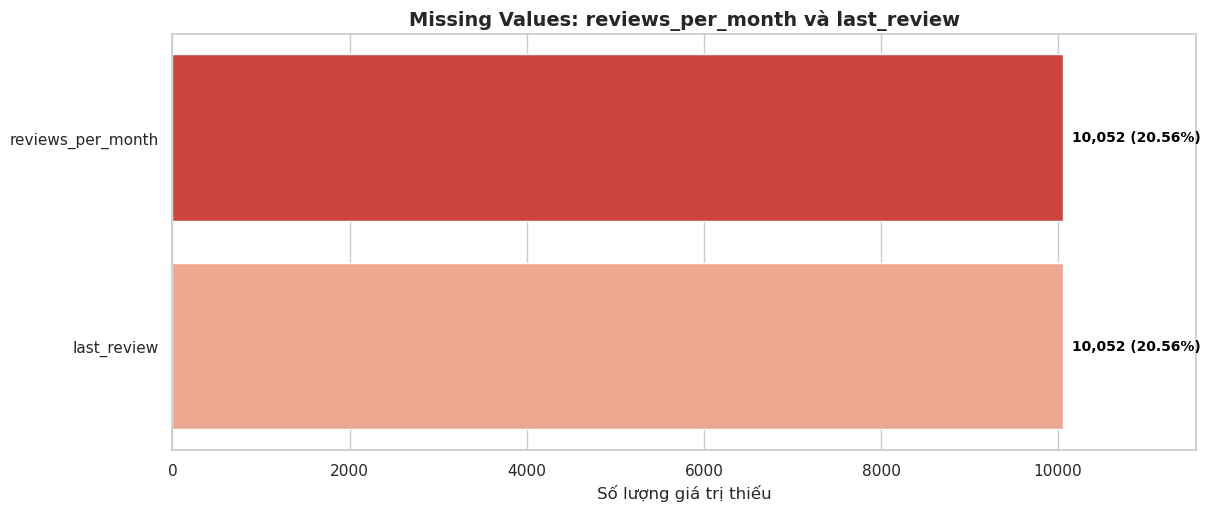

In [ ]:
print("Các cột bị thiếu giá trị")
for i, col in enumerate(column_names):
    col_data = data[:, i]
    missing_count = np.sum(col_data == '')
    
    if missing_count > 0:
        missing_percent = (missing_count / len(data) * 100)
        print(f"\n{col}:")
        print(f"  - Số lượng Missing : {missing_count:,}")
        print(f"  - Tỷ lệ % Missing  : {missing_percent:.2f}%")

plot_missing_values(data, column_names, 
                           ['host_name', 'name'], 
                           title='Missing Values: host_name và name')

# Biểu đồ 2: Missing values của reviews_per_month và last_review
plot_missing_values(data, column_names, 
                           ['reviews_per_month', 'last_review'], 
                           title='Missing Values: reviews_per_month và last_review')

### 2.3. Thống kê cơ bản

In [ ]:
# Các cột số (index trong column_names)
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
                   'latitude', 'longitude']

print("Thống kê cơ bản cho các biến số:")
for col in numeric_columns:
    if col in column_names:
        col_idx = np.where(column_names == col)[0][0]
        col_data = data[:, col_idx]
        
        # Chuyển sang số, loại bỏ giá trị rỗng
        numeric_data = []
        for val in col_data:
            if val != '':
                try:
                    numeric_data.append(float(val))
                except:
                    pass
        
        if len(numeric_data) > 0:
            numeric_data = np.array(numeric_data)
            print(f"\n{col}:")
            print(f"  Count        : {len(numeric_data)}")
            print(f"  Mean         : {np.mean(numeric_data):.2f}")
            print(f"  Std          : {np.std(numeric_data):.2f}")
            print(f"  Min          : {np.min(numeric_data):.2f}")
            print(f"  25%          : {np.percentile(numeric_data, 25):.2f}")
            print(f"  50% - Median : {np.percentile(numeric_data, 50):.2f}")
            print(f"  75%          : {np.percentile(numeric_data, 75):.2f}")
            print(f"  Max          : {np.max(numeric_data):.2f}")

Thống kê cơ bản cho các biến số:

price:
  Count        : 48895
  Mean         : 152.72
  Std          : 240.15
  Min          : 0.00
  25%          : 69.00
  50% - Median : 106.00
  75%          : 175.00
  Max          : 10000.00

minimum_nights:
  Count        : 48895
  Mean         : 7.03
  Std          : 20.51
  Min          : 1.00
  25%          : 1.00
  50% - Median : 3.00
  75%          : 5.00
  Max          : 1250.00

number_of_reviews:
  Count        : 48895
  Mean         : 23.27
  Std          : 44.55
  Min          : 0.00
  25%          : 1.00
  50% - Median : 5.00
  75%          : 24.00
  Max          : 629.00

reviews_per_month:
  Count        : 38843
  Mean         : 1.37
  Std          : 1.68
  Min          : 0.01
  25%          : 0.19
  50% - Median : 0.72
  75%          : 2.02
  Max          : 58.50

calculated_host_listings_count:
  Count        : 48895
  Mean         : 7.14
  Std          : 32.95
  Min          : 1.00
  25%          : 1.00
  50% - Median : 1.00
  75

In [8]:
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
print(f"Danh sách các cột sẽ xử lý: {categorical_columns}")
print("Thống kê cho các biến phân loại:")

for col in categorical_columns:
    col_idx = np.where(column_names == col)[0][0]
    col_data = data[:, col_idx]

    unique_vals, counts = np.unique(col_data, return_counts=True)
    
    print(f"\n{col.upper()}:")
    print(f"  - Số giá trị unique: {len(unique_vals)}")
    print(f"  - Top 5 giá trị phổ biến:")

    sorted_indices = np.argsort(counts)[::-1][:5]
    for idx in sorted_indices:
        print(f"      {unique_vals[idx]}: {counts[idx]}")

Danh sách các cột sẽ xử lý: ['neighbourhood_group', 'neighbourhood', 'room_type']
Thống kê cho các biến phân loại:

NEIGHBOURHOOD_GROUP:
  - Số giá trị unique: 5
  - Top 5 giá trị phổ biến:
      Manhattan: 21661
      Brooklyn: 20104
      Queens: 5666
      Bronx: 1091
      Staten Island: 373

NEIGHBOURHOOD:
  - Số giá trị unique: 221
  - Top 5 giá trị phổ biến:
      Williamsburg: 3920
      Bedford-Stuyvesant: 3714
      Harlem: 2658
      Bushwick: 2465
      Upper West Side: 1971

ROOM_TYPE:
  - Số giá trị unique: 3
  - Top 5 giá trị phổ biến:
      Entire home/apt: 25409
      Private room: 22326
      Shared room: 1160

NEIGHBOURHOOD:
  - Số giá trị unique: 221
  - Top 5 giá trị phổ biến:
      Williamsburg: 3920
      Bedford-Stuyvesant: 3714
      Harlem: 2658
      Bushwick: 2465
      Upper West Side: 1971

ROOM_TYPE:
  - Số giá trị unique: 3
  - Top 5 giá trị phổ biến:
      Entire home/apt: 25409
      Private room: 22326
      Shared room: 1160


## 3. Trực quan hóa dữ liệu (Visualization Results)

### 3.2. Phân phối giá (Price Distribution)

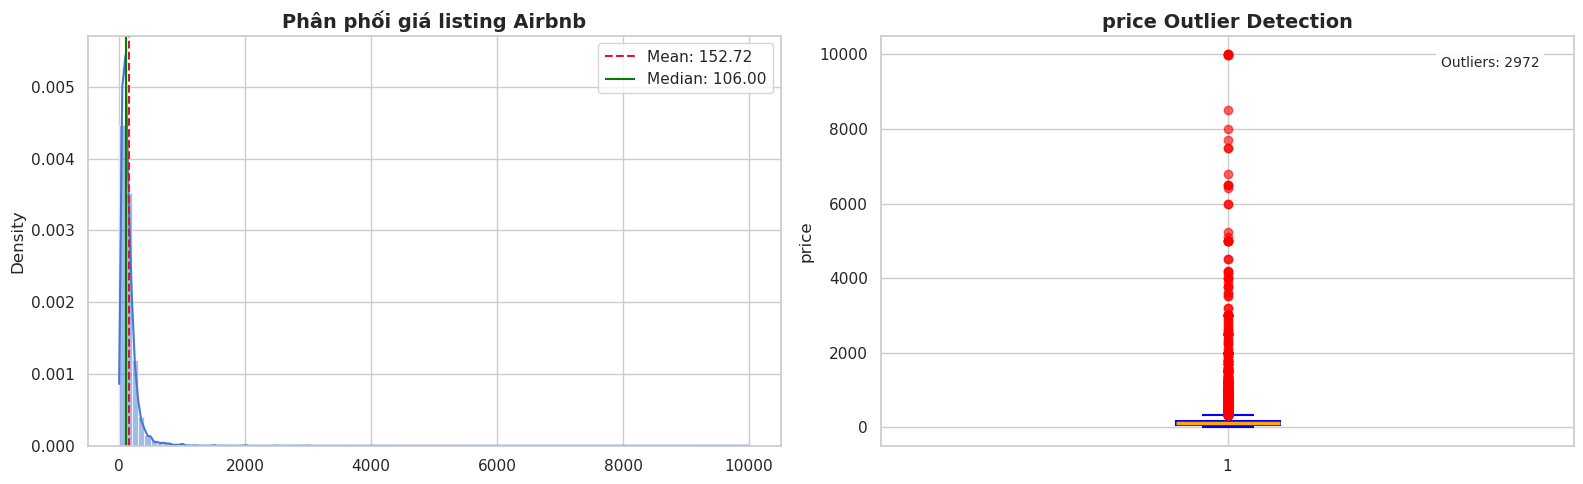

In [ ]:
# Lấy cột price
price_idx = np.where(column_names == 'price')[0][0]
price_data = data[:, price_idx]

# Chuyển sang số
prices = []
for val in price_data:
    if val != '':
        try:
            prices.append(float(val))
        except:
            prices.append(np.nan)
    else:
        prices.append(np.nan)

prices = np.array(prices)

# Vẽ phân phối giá
plot_distribution(prices, 'price', bins=100, title='Phân phối giá listing Airbnb')

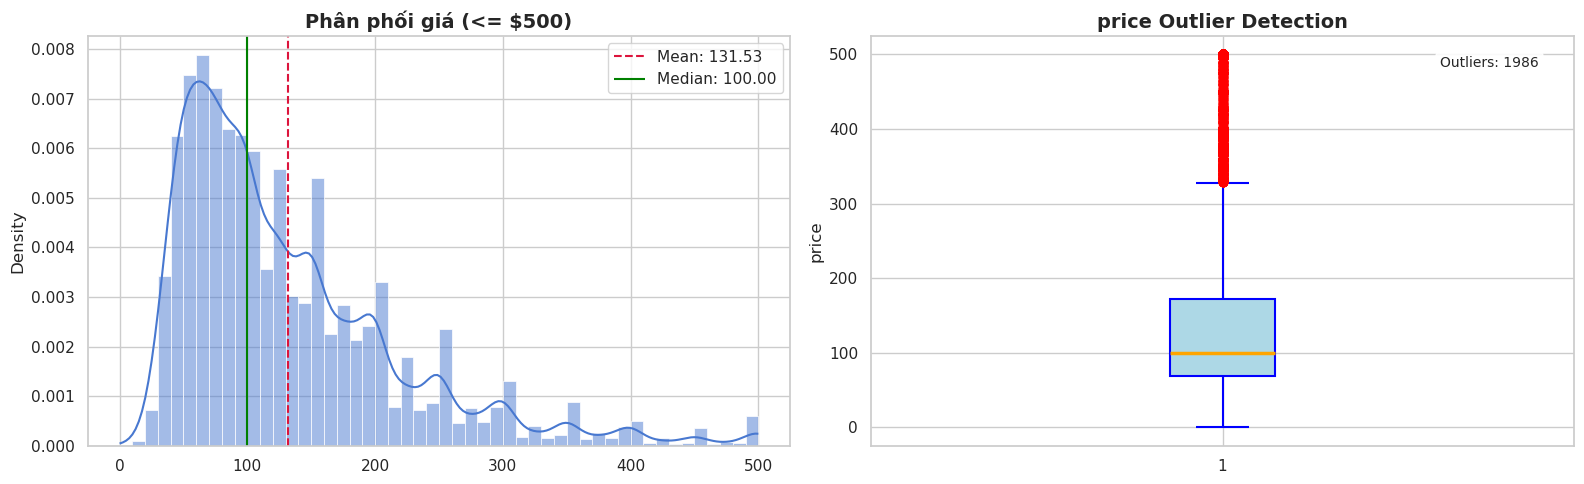

In [10]:
# Phân phối giá cho giá trị nhỏ hơn $500 để xem rõ hơn
prices_filtered = prices[(prices <= 500) & (~np.isnan(prices))]
plot_distribution(prices_filtered, 'price', bins=50, title='Phân phối giá (<= $500)')

### 3.3. Phân phối theo khu vực (Neighbourhood Group)

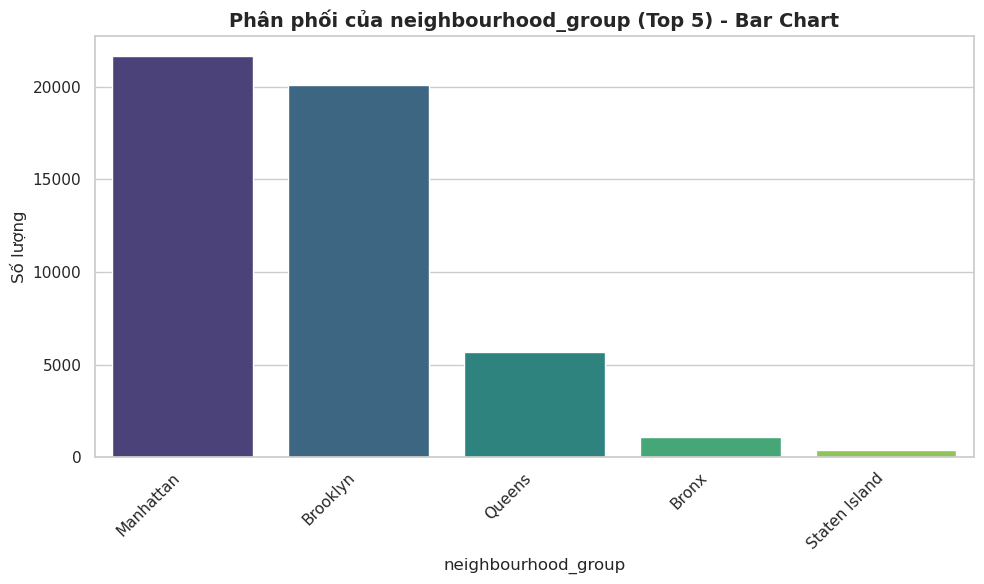

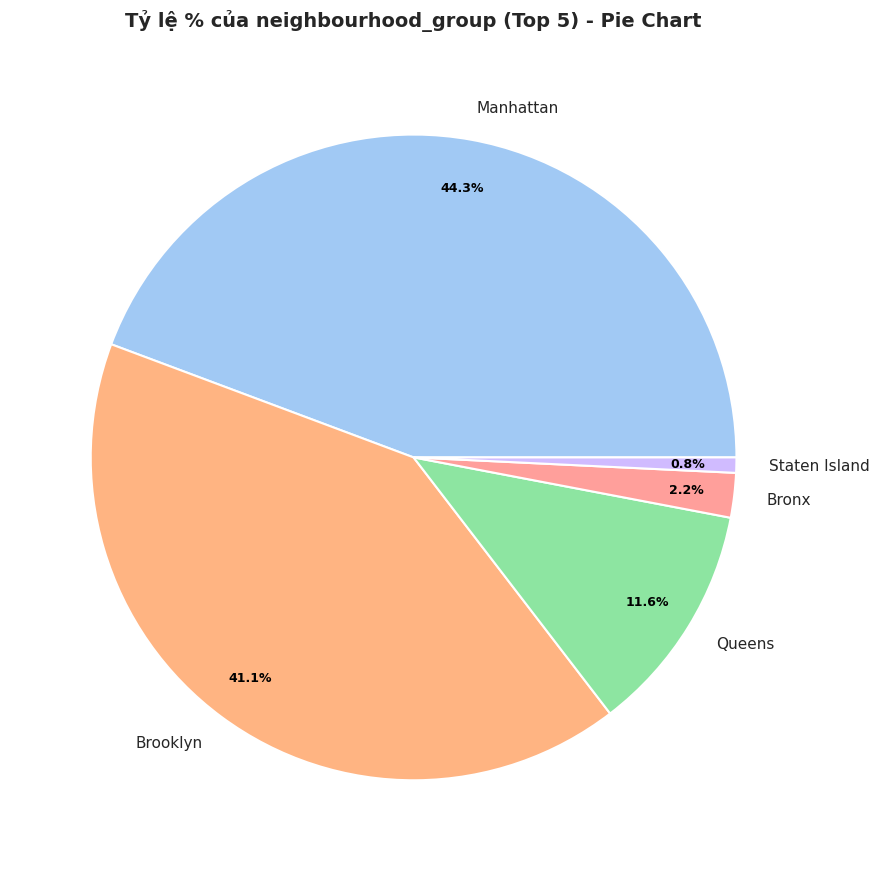

In [11]:
# Phân phối theo neighbourhood_group
ng_idx = np.where(column_names == 'neighbourhood_group')[0][0]
neighbourhood_groups = data[:, ng_idx]

plot_categorical_distribution(neighbourhood_groups, 'neighbourhood_group', top_n=5)

### 3.4. Giá trung bình theo khu vực

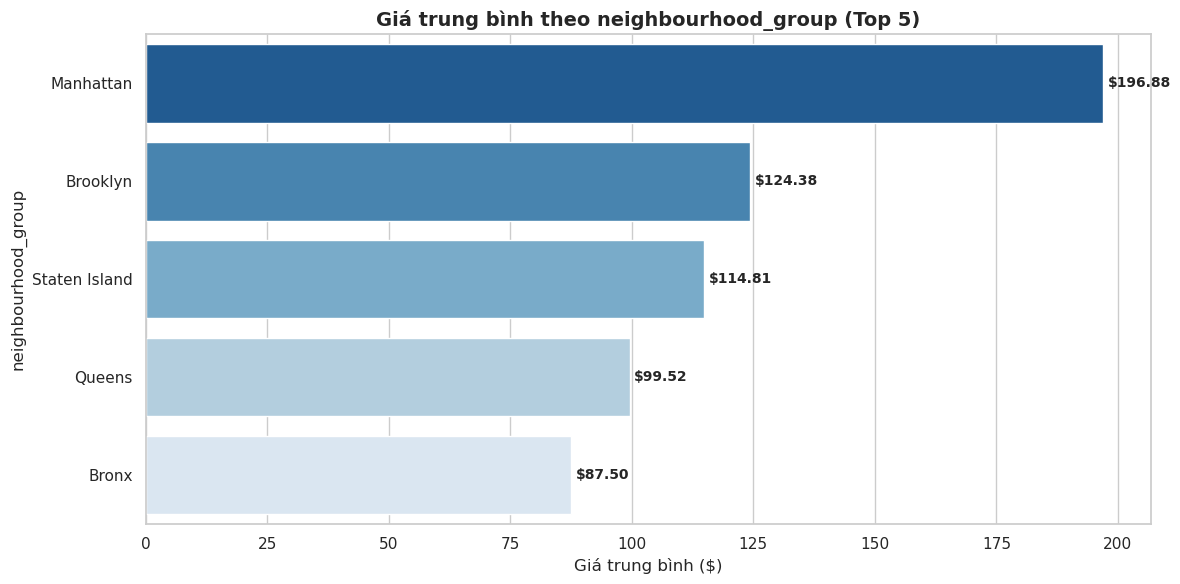

In [12]:
# Giá trung bình theo neighbourhood_group
plot_price_by_category(neighbourhood_groups, prices, 'neighbourhood_group', top_n=5)

### 3.4.1. Mật độ và phân phối giá theo khu vực (Violin Plot)

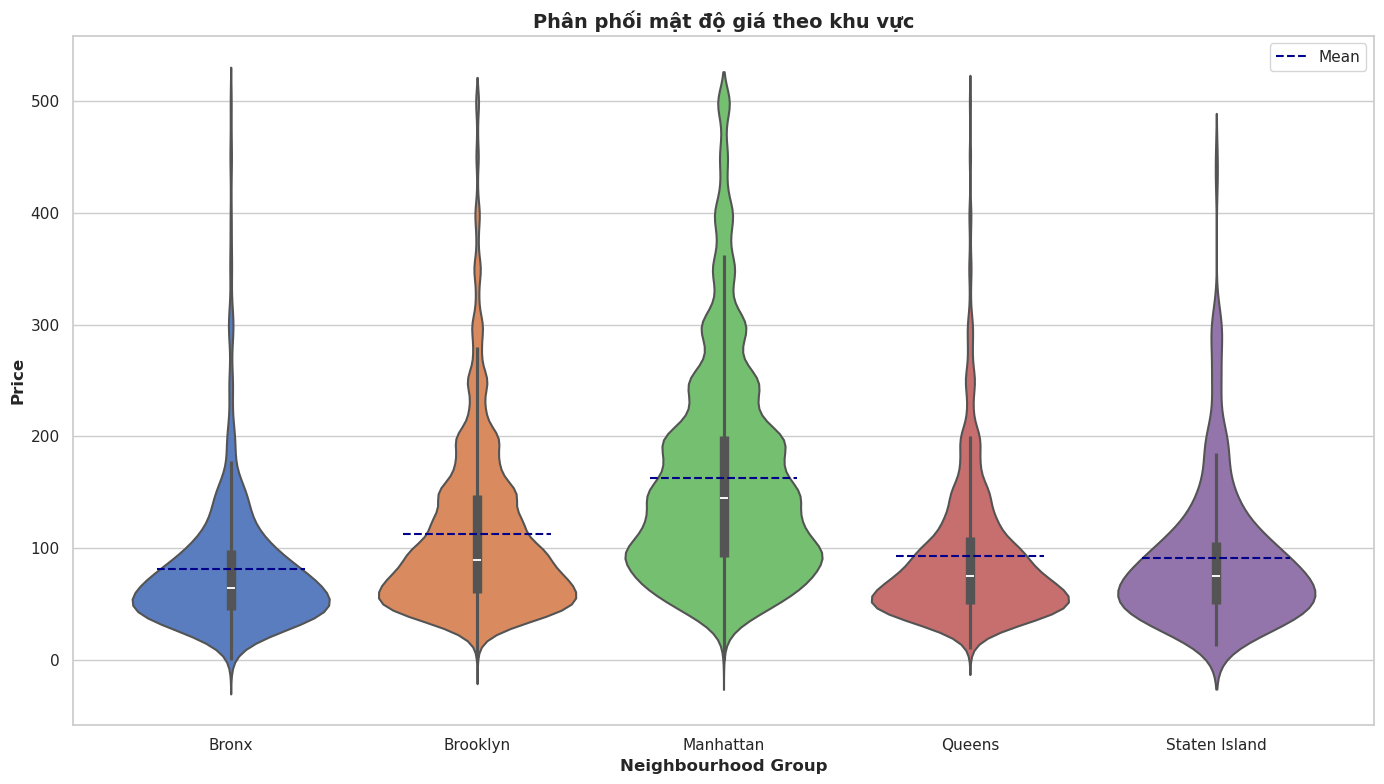

In [13]:
# Vẽ violin plot cho phân phối giá theo neighbourhood_group
prices_filtered_600 = prices[(prices <= 500) & (~np.isnan(prices))]
neighbourhood_groups_filtered = neighbourhood_groups[(prices <= 500) & (~np.isnan(prices))]
plot_price_density_by_neighbourhood(neighbourhood_groups_filtered, prices_filtered_600)

### 3.5. Phân phối theo loại phòng (Room Type)

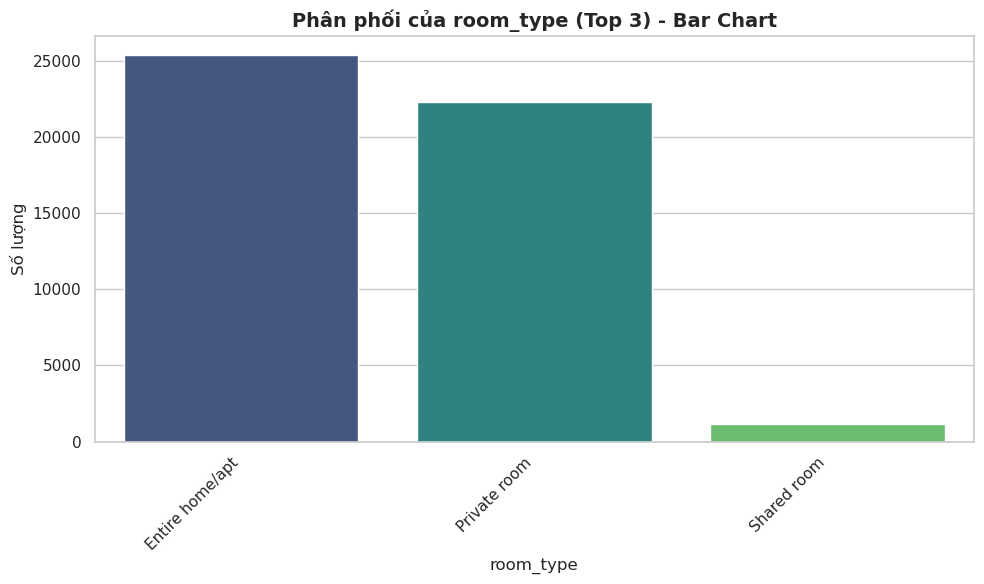

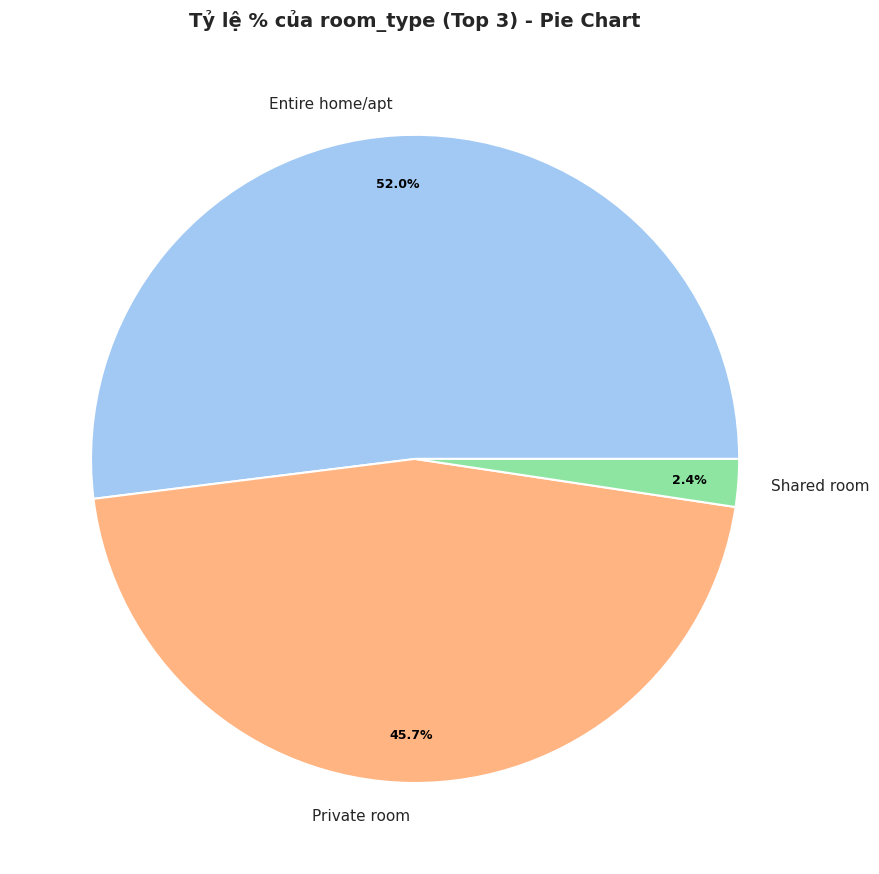

In [14]:
# Phân phối theo room_type
rt_idx = np.where(column_names == 'room_type')[0][0]
room_types = data[:, rt_idx]

plot_categorical_distribution(room_types, 'room_type', top_n=3)

### 3.6. Phân phối giá theo loại phòng

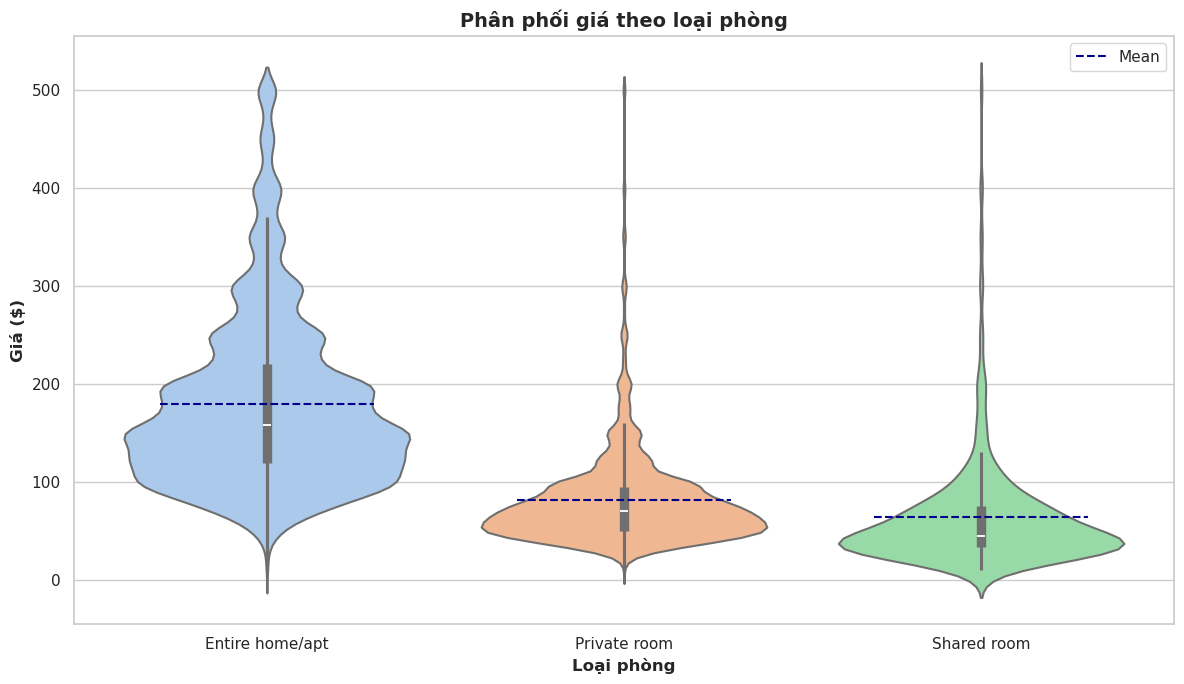

In [15]:
# Phân phối giá theo room type
plot_price_distribution_by_room_type(room_types, prices)

### 3.7. Phân phối địa lý của listings

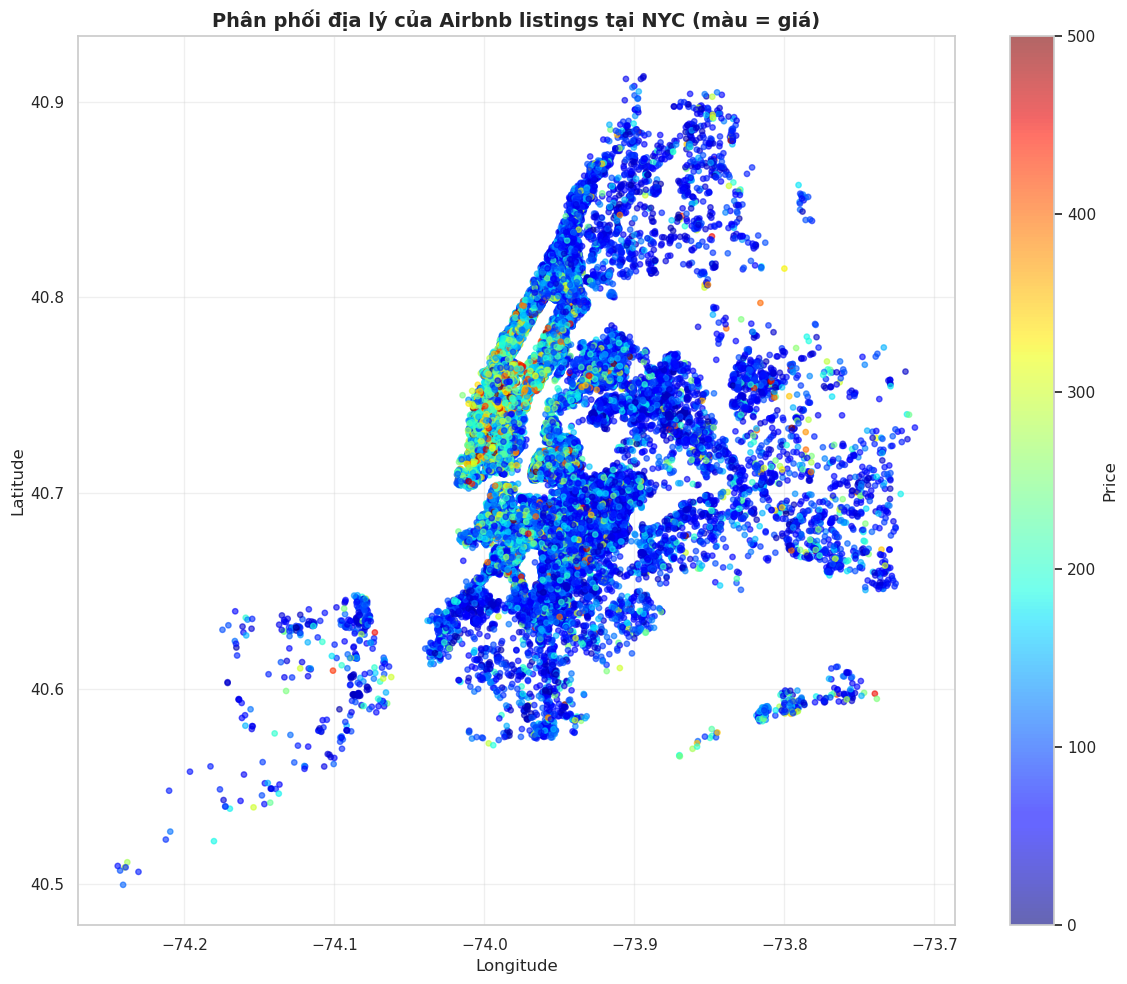

In [16]:
# Lấy dữ liệu latitude và longitude
lat_idx = np.where(column_names == 'latitude')[0][0]
lon_idx = np.where(column_names == 'longitude')[0][0]

latitudes = []
longitudes = []

for i in range(len(data)):
    try:
        lat = float(data[i, lat_idx])
        lon = float(data[i, lon_idx])
        latitudes.append(lat)
        longitudes.append(lon)
    except:
        latitudes.append(np.nan)
        longitudes.append(np.nan)

latitudes = np.array(latitudes)
longitudes = np.array(longitudes)

# Lọc giá <= 500 cho colormap
prices_filtered_geo = np.where(prices > 500, np.nan, prices)

# Vẽ phân phối địa lý
plot_geographical_distribution(longitudes, latitudes, 
                               color_data=prices_filtered_geo,
                               title='Phân phối địa lý của Airbnb listings tại NYC (màu = giá)')

### 3.8. Ma trận tương quan giữa các biến số

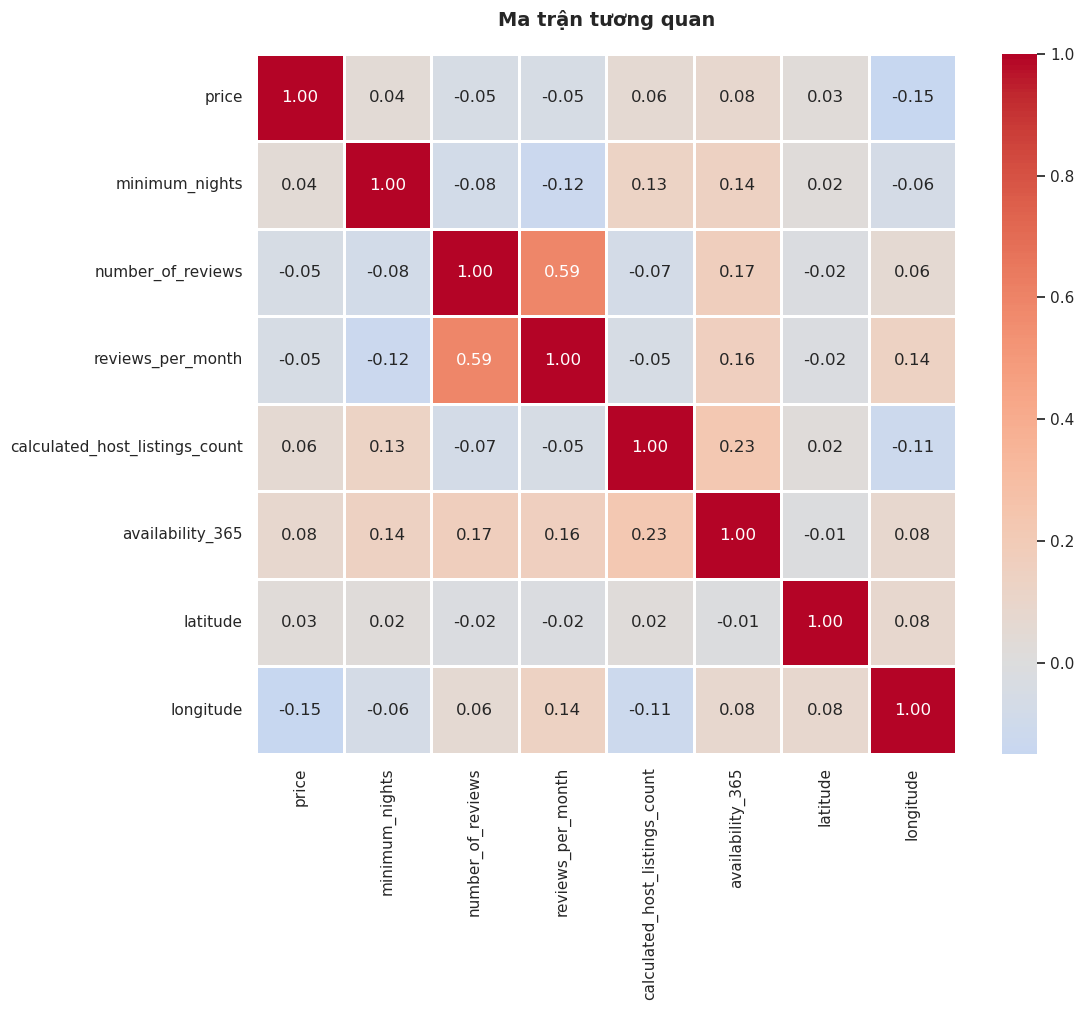

In [ ]:
# Tạo ma trận dữ liệu số
numeric_col_names = ['price', 'minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count', 
                     'availability_365', 'latitude', 'longitude']

numeric_data_list = []

for col in numeric_col_names:
    if col in column_names:
        col_idx = np.where(column_names == col)[0][0]
        col_data = data[:, col_idx]
        
        # Chuyển sang số
        numeric_vals = []
        for val in col_data:
            if val != '':
                try:
                    numeric_vals.append(float(val))
                except:
                    numeric_vals.append(0)
            else:
                numeric_vals.append(0)
        
        numeric_data_list.append(np.array(numeric_vals))

# Stack thành ma trận 2D
numeric_matrix = np.column_stack(numeric_data_list)

# Vẽ heatmap tương quan
plot_correlation_heatmap(numeric_matrix, numeric_col_names)

### 3.9. Top hosts có nhiều listings nhất

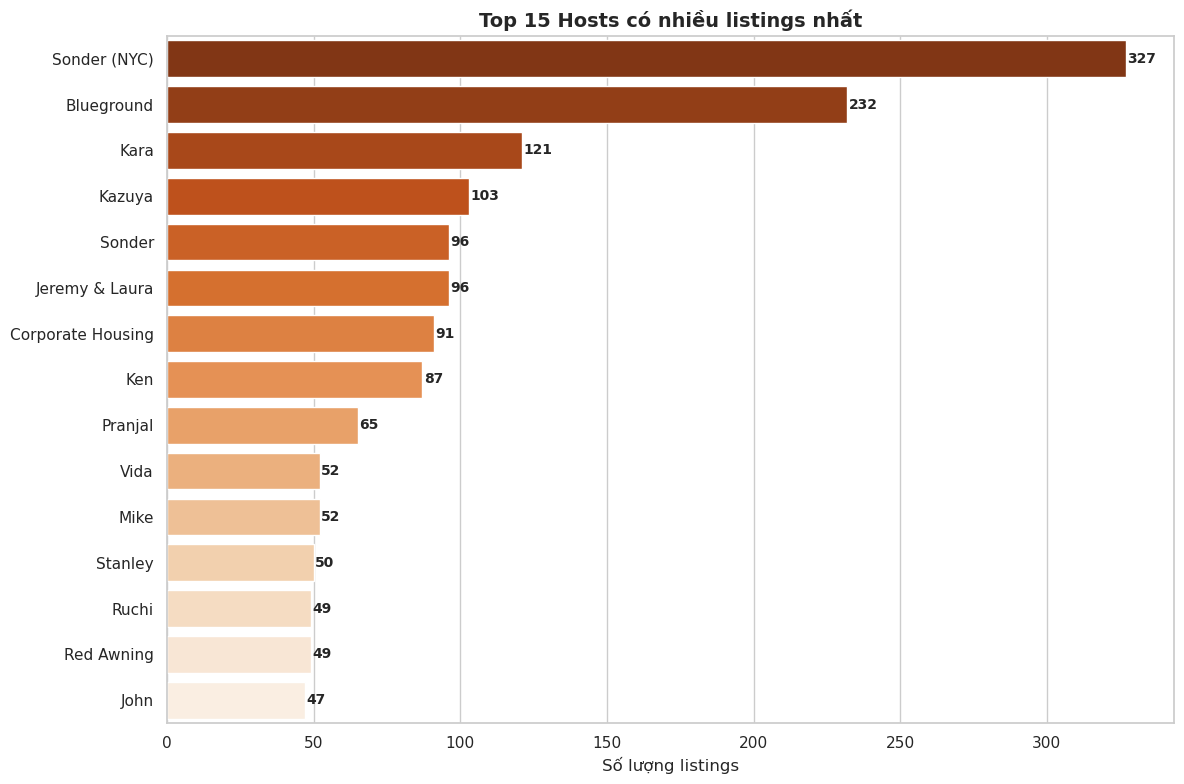

In [18]:
# Lấy dữ liệu host
host_id_idx = np.where(column_names == 'host_id')[0][0]
host_name_idx = np.where(column_names == 'host_name')[0][0]

host_ids = data[:, host_id_idx]
host_names = data[:, host_name_idx]

# Vẽ biểu đồ top hosts
plot_top_hosts(host_ids, host_names, top_n=15)

### 3.10. Top 10 Neighbourhoods đắt nhất và rẻ nhất

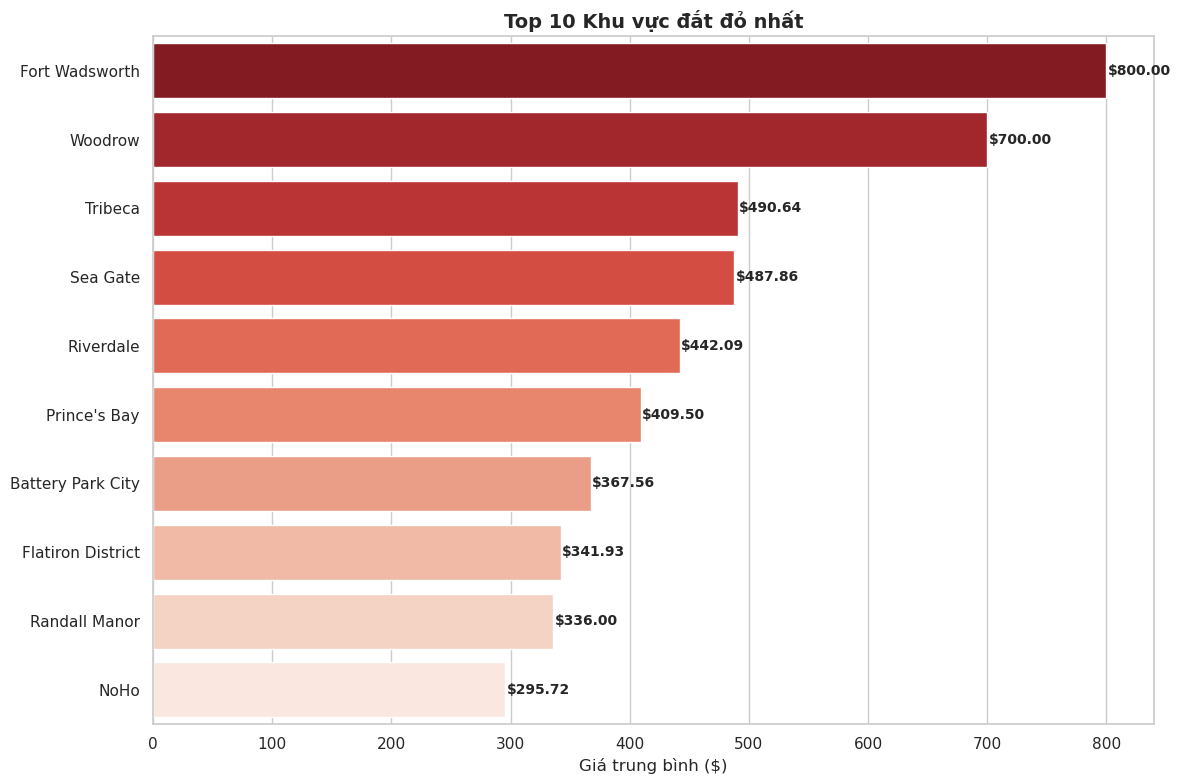

In [19]:
# Lấy dữ liệu neighbourhood
neighbourhood_idx = np.where(column_names == 'neighbourhood')[0][0]
neighbourhoods = data[:, neighbourhood_idx]

# Top 10 đắt nhất
plot_top_expensive_neighbourhoods(neighbourhoods, prices, top_n=10, most_expensive=True)

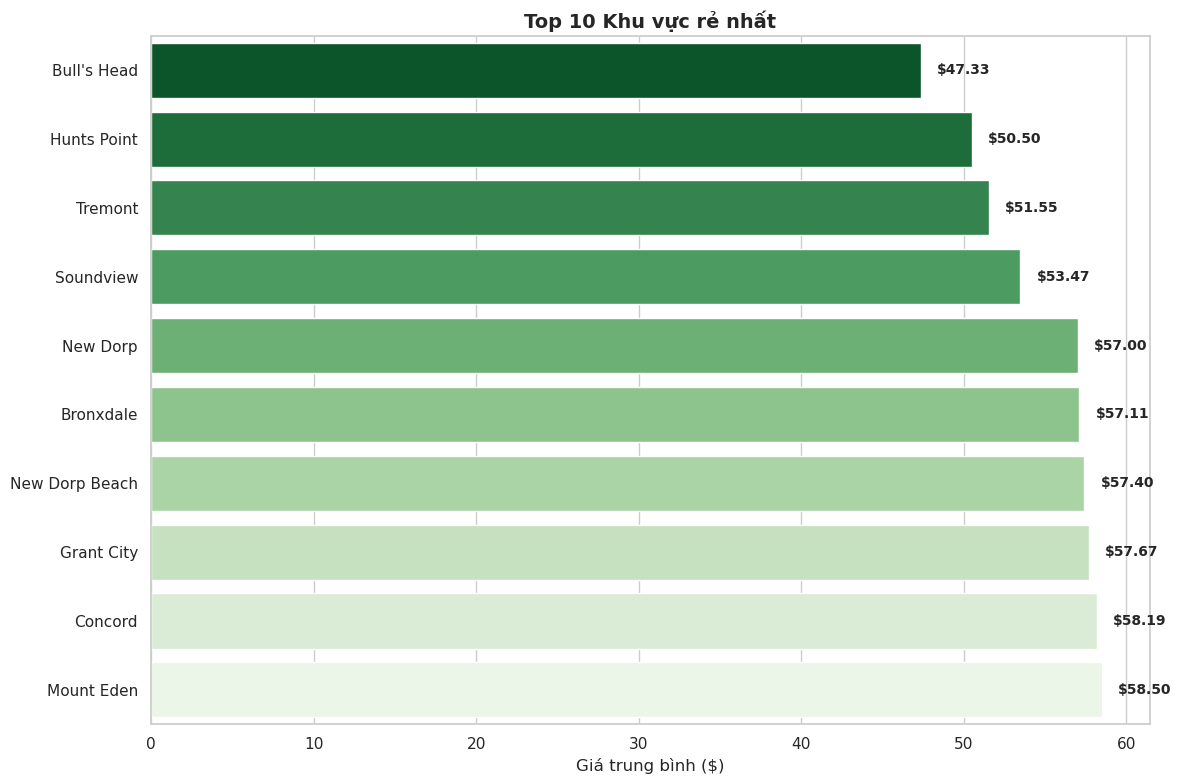

In [20]:
# Top 10 rẻ nhất
plot_top_expensive_neighbourhoods(neighbourhoods, prices, top_n=10, most_expensive=False)

### 3.11. Top 10 từ phổ biến trong tên listing

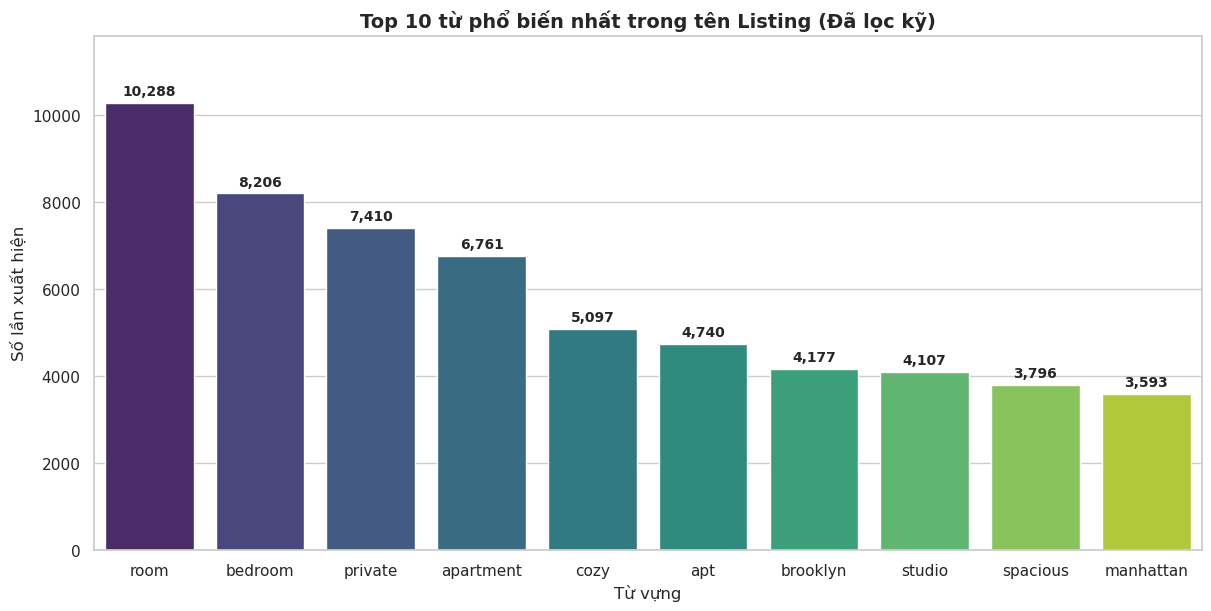

In [21]:
name_idx = np.where(column_names == 'name')[0][0]
listing_names = data[:, name_idx]

# Vẽ biểu đồ top 10 từ phổ biến
plot_top_words_name(data, column_names, top_n=10)